In [1]:
import numpy as np
import matplotlib.pyplot as plt

from metpy.mapping.MPMap import MPMap
from metpy.mapping.points import *
from metpy.mapping.triangles import *
from metpy.mapping.tests.test_MPGridding import create_test_data

from mpl_toolkits import basemap
from scipy.spatial import Voronoi, Delaunay, ConvexHull
from scipy.spatial.distance import euclidean

from matplotlib.delaunay.triangulate import Triangulation

from collections import deque

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 16)

m = basemap.Basemap(
    width=4800000, height=3100000, projection='aea', resolution='l',
    lat_1=28.5, lat_2=44.5, lat_0=38.5, lon_0=-97.,area_thresh=5000)

wgs84 = basemap.pyproj.Proj("+init=EPSG:4326")
aea = basemap.pyproj.Proj(m.projparams) #'+init=EPSG:5069')

 

def plot_triangle(triangle):
    x = [triangle[0,0], triangle[1,0], triangle[2,0], triangle[0,0]]
    y = [triangle[0,1], triangle[1,1], triangle[2,1], triangle[0,1]]
    
    plt.plot(x, y, "-", linewidth=4)

def calc_voronoi_lines(vor):
    
    for simplex in vor.ridge_vertices:
        simplex = np.asarray(simplex)
        if np.all(simplex >= 0):
            plt.plot(vor.vertices[simplex, 0], vor.vertices[simplex, 1], 'k--')
        


C:\Users\ahaberli\anaconda3\envs\unidata3\lib\site-packages\matplotlib\cbook.py:137: MatplotlibDeprecationWarning: The matplotlib.delaunay module was deprecated in version 1.4. Use matplotlib.tri.Triangulation instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
x, y, temp = create_test_data("air_temperature")

#m.drawstates()
#m.drawcountries()
#m.drawcoastlines()

xp, yp = basemap.pyproj.transform(wgs84, aea, x, y)

xg, yg = generate_grid(15000, 15000, get_boundary_coords(xp, yp))

bbox = get_boundary_coords(xp, yp)

xstep, ystep = get_xy_steps(bbox, 15000, 15000)

grid_points = generate_grid_coords(xg, yg)

xg, yg, img = interp_points(xp, yp, temp, interp_type='natural_neighbor', xres=15000, yres=15000)

#img = np.ma.masked_where(img==None, img)

#m.contourf(xg, yg, img)
#m.drawstates()
#m.drawcoastlines()
#m.drawcountries()
#plt.plot(grid_points[:,0], grid_points[:,1], '*')

#print(xp, yp)

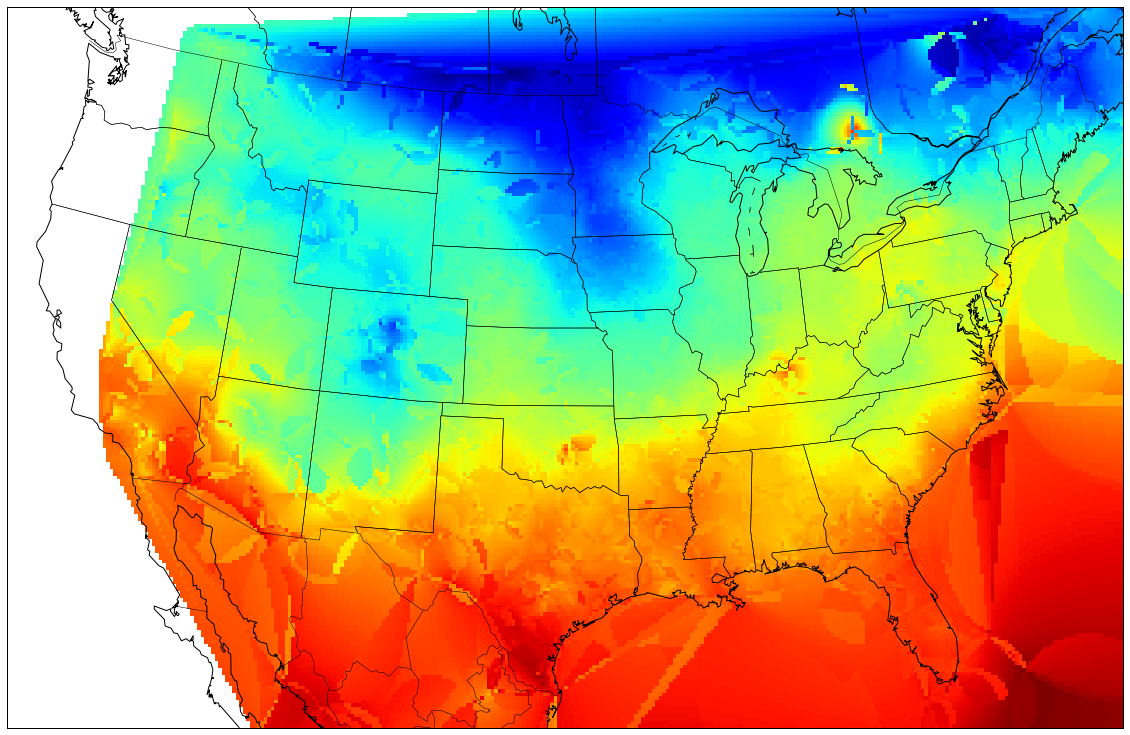

In [3]:
img_nn = np.ma.masked_where(img < -100, img)

m.pcolormesh(xg, yg, img_nn.reshape(xg.shape))
m.drawstates()
m.drawcountries()
m.drawcoastlines()

In [1]:
vor = Voronoi(points, incremental=True)

plt.plot(grid_points[:,0], grid_points[:,1], 'k+', markersize=10)
plt.plot(grid[0], grid[1], "rs", markersize=20, fillstyle='none')

#plot_voronoi_lines(plt, vor)    
    
plt.plot(xp, yp, "kd", markersize=10)

xlow = grid[0] - 500000
xhigh = grid[0] + 500000
ylow = grid[1] - 500000
yhigh = grid[1] + 500000
plt.xlim(xlow, xhigh)
plt.ylim(ylow, yhigh)

plt.plot(t.circumcenters[:,0], t.circumcenters[:,1], "ko", markersize=20, fillstyle='none')

plt.plot(grid_points[:,0], grid_points[:,1], 'k+', markersize=10)
plt.plot(grid[0], grid[1], "rs", markersize=20, fillstyle='none')



new_tri = Delaunay(neighbor_vertices)

ch_match = new_tri.find_simplex(neighbor_vertices[new_tri.points[hull]])

interp_info = []
new_centers = []
poly_area = 0

for i in range(len(hull.vertices)):

    p0 = points[hull.vertices[i]]
    p1 = points[hull.vertices[(i+1)%len(hull.vertices)]]
    p2 = points[hull.vertices[(i+2)%len(hull.vertices)]]
    
    poly_vertices = []
    print("tri matches", len(ch_match[(i+1)%len(hull.vertices)]))
    for triangle in [ch_match[(i+1)%len(hull.vertices)]]:
        pts = new_tri.points[new_tri.simplices[triangle]]
        
        poly_vertices.append(circumcenter(pts)) 
    
    c1 = circumcenter(np.array([grid, p0, p1]))
    c2 = circumcenter(np.array([grid, p1, p2]))
    new_centers.append(c1)
    new_centers.append(c2)
    print(c1)
    
    poly_vertices.append(c1)
    poly_vertices.append(c1)
    
    print("poly verts", poly_vertices)
    interp_info.append((area(np.array(poly_vertices)), p1))

print(interp_info)

new_centers = np.array(new_centers)

for i in range(len(new_centers)):
    
    i1 = (i+1)%len(new_centers)
    
    x = [new_centers[i,0], new_centers[i1,0]]
    y = [new_centers[i,1], new_centers[i1,1]]
    
    plt.plot(x, y, "k-")
    
#vor = Voronoi(points, incremental=True)

#plot_voronoi_lines(plt, vor)    
    
#plt.plot(xp, yp, "kd", markersize=10)


xlow = grid[0] - 150000
xhigh = grid[0] + 150000
ylow = grid[1] - 150000
yhigh = grid[1] + 150000
plt.xlim(xlow, xhigh)
plt.ylim(ylow, yhigh)

plt.plot(t.circumcenters[:,0], t.circumcenters[:,1], "ko", markersize=20, fillstyle='none')

NameError: name 'plt' is not defined

In [ ]:


for adjacent_neighbor in tri.neighbors[cur_tri]:

    for second_neighbor in tri.neighbors[adjacent_neighbor]:
        triangle = tri.points[tri.simplices[second_neighbor]]
        cur_x, cur_y = circumcenter(triangle)
        r = circumcircle_radius(triangle)

        if euclidean([position[0], position[1]], [cur_x, cur_y]) < r:
            nn.add(second_neighbor)

    triangle = tri.points[tri.simplices[adjacent_neighbor]]
    cur_x, cur_y = circumcenter(triangle)
    r = circumcircle_radius(triangle)

    if euclidean([position[0], position[1]], [cur_x, cur_y]) < r:
        nn.add(adjacent_neighbor)

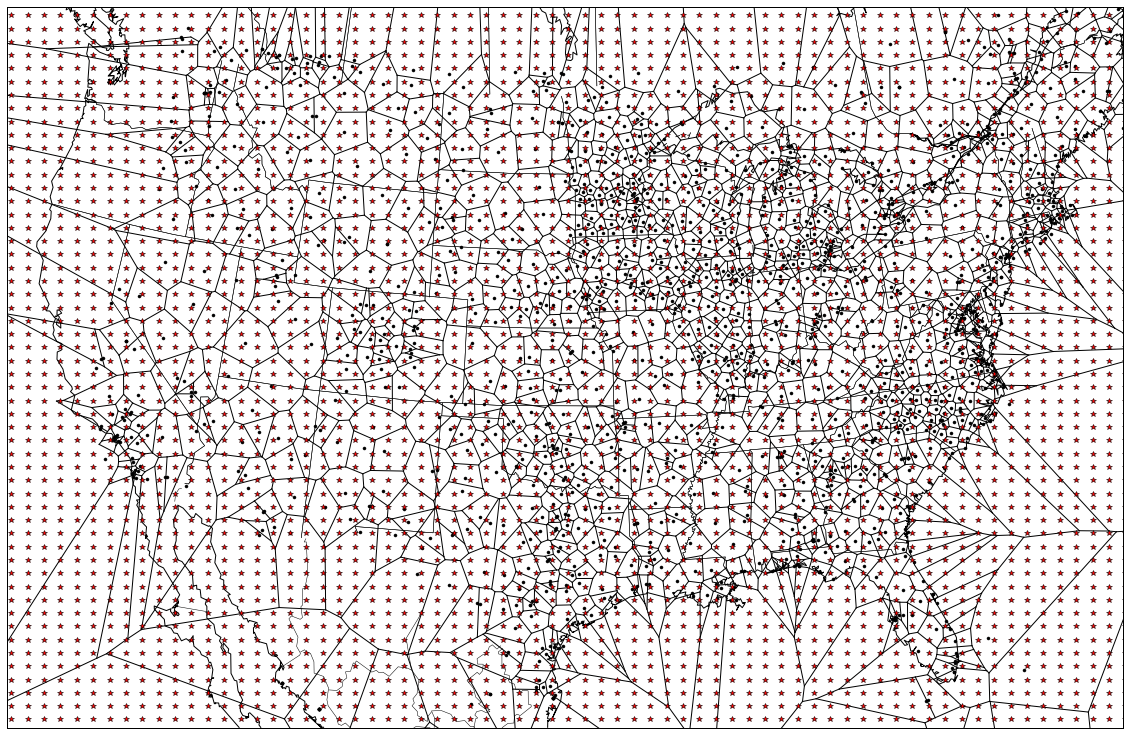

In [47]:
plt.plot(t.circumcenters[:,0], t.circumcenters[:,1], "ko", markersize=20, fillstyle='none')

#plt.legend(numpoints=1)

xlow = grid[0] - 150000
xhigh = grid[0] + 150000
ylow = grid[1] - 150000
yhigh = grid[1] + 150000
plt.xlim(xlow, xhigh)
plt.ylim(ylow, yhigh)
#plt.plot(grid_points, "bo")

plt.plot(grid_points[:,0], grid_points[:,1], 'k+', markersize=10)
plt.plot(grid[0], grid[1], "rs", markersize=20, fillstyle='none')

#points.append((grid[0], grid[1]))
vor = Voronoi(points, incremental=True)

calc_voronoi_lines(vor)

view = basemap.Basemap(width=4800000, height=3100000, projection='aea', resolution='l',
                       lat_1=28.5, lat_2=44.5, lat_0=38.5, lon_0=-97.,area_thresh=10000)

lons, lats, z = create_test_data("air_temperature")

xp, yp = view(lons, lats)

xg, yg, img = interp_points(xp, yp, z, interp_type='nearest', xres=100, yres=100)

points = np.array(list(zip(xp, yp)))

tri = Delaunay(points)
vor = Voronoi(points)

calc_voronoi_lines(vor)

#vor = Voronoi(list(zip(xg.flatten(), yg.flatten())))

#calc_voronoi_lines(vor)

plt.plot(xp, yp, "k.")
plt.plot(xg, yg, "r*")
    
view.drawstates()
view.drawcoastlines()

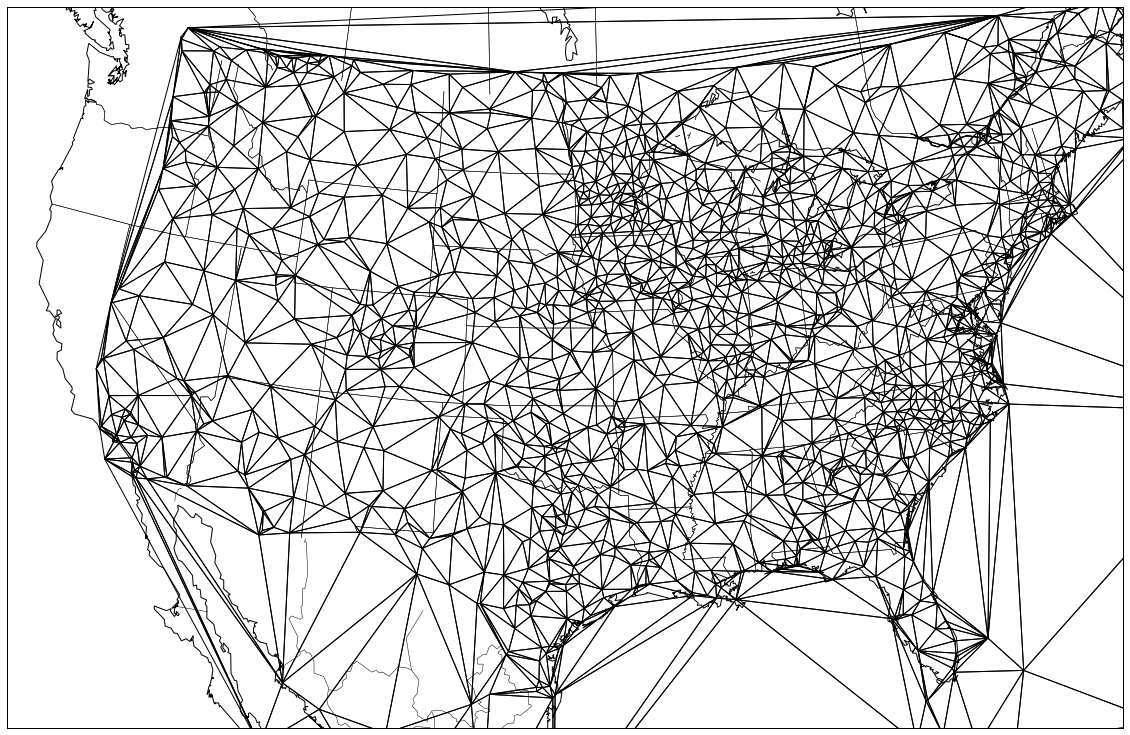

In [40]:
for x1,y1,z1 in tri.simplices:
    x = tri.points[x1]
    y = tri.points[y1]
    z = tri.points[z1]
    
    plt.plot([x[0], y[0], z[0], x[0]], [x[1], y[1], z[1], x[1]], 'k-')
    
view.drawstates()
view.drawcoastlines()

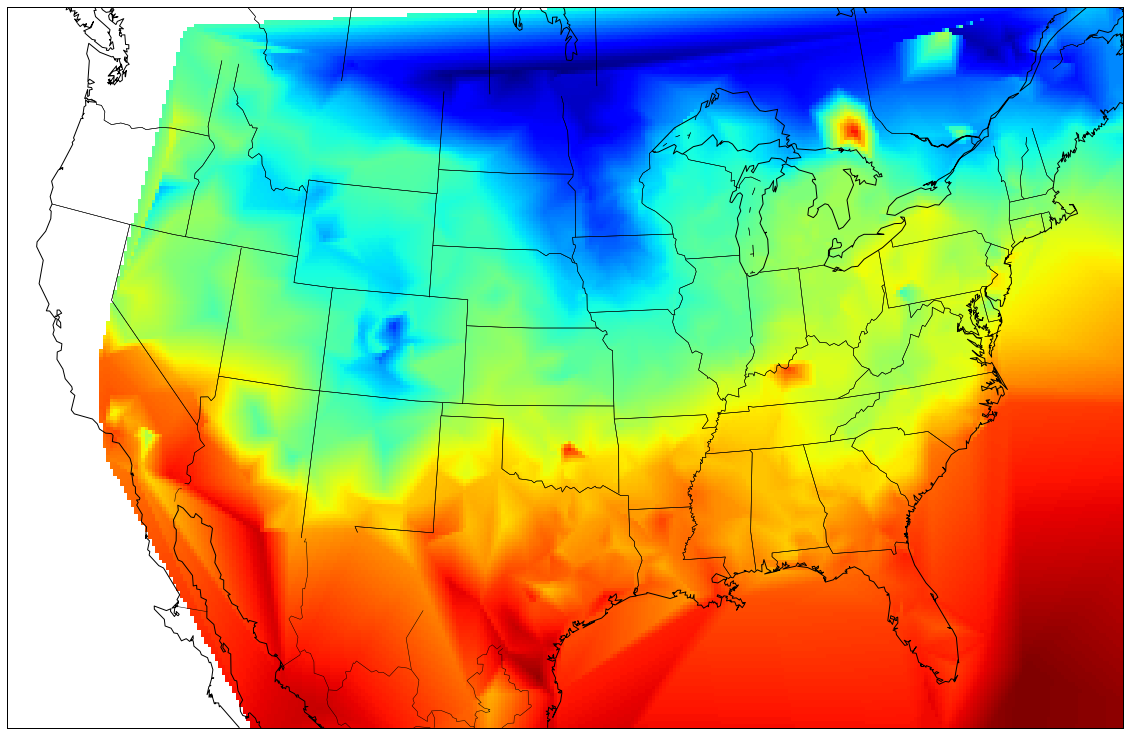

In [11]:

xg, yg, img1 = interp_points(xp, yp, temp, interp_type='linear', xres=15000, yres=15000)

img1 = np.ma.masked_where(np.isnan(img1), img1)

m.pcolormesh(xg, yg, img1)

m.drawstates()
m.drawcoastlines()

#plt.plot(500542.49751149, 264818.7300147, "k.")

In [7]:
from shapely.geometry import Polygon

pt = [[ 3912938.99315919,1067451.38638385],
 [ 4020112.69695081,1099710.43619174],
 [ 3981029.50119899,1131248.56237098],
 [ 3966613.19656506,1131528.10293322],
 [ 3941388.89500111,1117794.3888583 ],
 [ 3912938.99315919,1067451.38638385]]

p = Polygon(pt)

print(p.area)

3229371196.5476885


In [ ]:
triangles = Triangulation(xp, yp)

natn = NNInterpolator(triangles, t)

print(dir(nn_grid))

cur_slice = (slice(bbox['southwest'][1],bbox['northeast'][1],ystep*1j), \
             slice(bbox['southwest'][0], bbox['northeast'][0], xstep*1j))

print(triangles)
nngrid = natn.__getitem__(cur_slice)

nngrid = np.ma.masked_where(np.isnan(nngrid), nngrid)
plt.pcolormesh(xg, yg, nngrid)

def calc_voronoi_lines(vor):
    
    for simplex in vor.ridge_vertices:
        simplex = np.asarray(simplex)
        if np.all(simplex >= 0):
            plt.plot(vor.vertices[simplex, 0], vor.vertices[simplex, 1], 'k-')

    center = points.mean(axis=0)

#    for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
#        simplex = np.asarray(simplex)
#        if np.any(simplex < 0):
#            i = simplex[simplex >= 0][0]  # finite end Voronoi vertex
#            t = points[pointidx[1]] - points[pointidx[0]]  # tangent
#            t = t / np.linalg.norm(t)
#            n = np.array([-t[1], t[0]])  # normal
#            midpoint = points[pointidx].mean(axis=0)
#            far_point = vor.vertices[i] + np.sign(np.dot(midpoint - center, n)) * n * 100
#            plt.plot([vor.vertices[i, 0], far_point[0]], [vor.vertices[i, 1], far_point[1]], 'k--')


In [182]:
triangle = tri.points[tri.simplices[cur_tri]]

area = 0

for i in range(len(triangle)):
    
    p1 = v[i]
    p2 = v[(i+1)%3]
    
    area += np.cross(p1, p2)
    
print(.5*area)


3319766434.15


In [9]:
for v in ch_match:
    print(v)

2
0
1
1
1


In [62]:
triangle = [(2964013.443947455, 915316.9766312272), (2976154.0514321094, 924302.0575373052), (2976154.0514321094, 924302.0575373052)]

area = 0

for i in range(len(triangle)):

    p1 = triangle[i]
    p2 = triangle[(i + 1) % 3]
    print(p1, p2)
    area += np.cross(p1, p2)

print(area)

(2964013.443947455, 915316.9766312272) (2976154.0514321094, 924302.0575373052)
(2976154.0514321094, 924302.0575373052) (2976154.0514321094, 924302.0575373052)
(2976154.0514321094, 924302.0575373052) (2964013.443947455, 915316.9766312272)
0.0
